# **Task 2: Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.**

In [1]:
# Importing the necessary libraries
import pandas as pd

# Load the uploaded train and test datasets
train_file_path = '/content/train_titanic.csv'
test_file_path = '/content/test_titanic.csv'

# Load the datasets into pandas dataframes
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Preview the training and test datasets
train_data.head(), test_data.head()

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

# Summary of Training Set

The training dataset includes the following columns:

**PassengerId**: A unique identifier for each passenger

**Survived**: Survival status (0 = No, 1 = Yes).

**Pclass**: Passenger class (1st = Upper, 2nd = Middle, 3rd = Lower).

**Name**: Passenger's name.

**Sex**: Gender of the passenger.

**Age**: Age of the passenger.

**SibSp**: Number of siblings or spouses aboard.

**Parch**: Number of parents or children aboard. (NOTE: Some children travelled only with a nanny, therefore parch=0 for them.)

**Ticket**: Ticket number.

**Fare**: Ticket fare.

**Cabin**: Cabin number (many missing values).

**Embarked**: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

# Summary of Test Set
The test set contains the same columns, except it does not include the Survived column.

# **We will start by cleaning the data (handling/ replacing missing values)**

In [2]:
# Checking for missing values in both the training and test datasets
train_missing = train_data.isnull().sum()
test_missing = test_data.isnull().sum()

train_missing, test_missing

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

*TRAIN DATASET*

From the above, we know that there are 177 missing values for Age, 687 missing values for Cabin and 2 missing values for Embarked.

---

*TEST DATASET*

From the above, we know that there are 86 missing values for Age, 1 missing values for Fare and 327 missing values for Cabin.

In [6]:
# We can fill missing 'Age' based on median values of each 'Pclass' group in both train and test sets
train_data['Age'].fillna(train_data.groupby('Pclass')['Age'].transform('median'), inplace = True)
test_data['Age'].fillna(test_data.groupby('Pclass')['Age'].transform('median'), inplace = True)

# Filling missing 'Embarked' values in the training set with the mode (most frequent port)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

# Filling missing 'Fare' value in the test set with the median
test_data['Fare'].fillna(test_data['Fare'].median())

# For the 'Cabin' column, let's create a new feature 'HasCabin' which indicates whether a cabin number is present or not
train_data['HasCabin'] = train_data['Cabin'].notnull().astype(int)
test_data['HasCabin'] = test_data['Cabin'].notnull().astype(int)

# Now, let's check if all missing values have been addressed
train_missing_fixed = train_data.isnull().sum()
test_missing_fixed = test_data.isnull().sum()

train_missing_fixed, test_missing_fixed

<ipython-input-6-ad2975116cce>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data.groupby('Pclass')['Age'].transform('median'), inplace = True)
<ipython-input-6-ad2975116cce>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         0
 HasCabin         0
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          327
 Embarked         0
 HasCabin         0
 dtype: int64)

The missing values for age, fare and embarked has been filed.

Despite 'Cabin' still having missing values, we have created a new column 'HasCabin' to indicate whether a cabin number is available.

# We now proceed with **Exploratory Data Analysis (EDA)**.

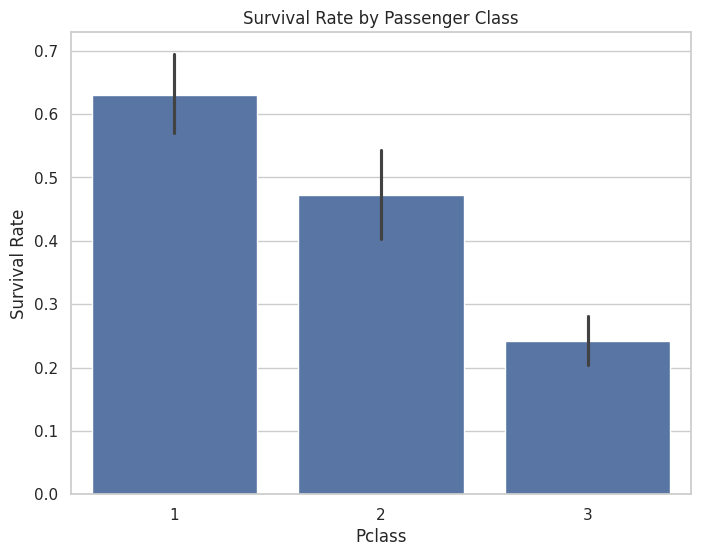

In [18]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual styling
sns.set(style = "whitegrid")

# Exploring survival rate by different factors

# 1) Survival Rate by Passenger Class
plt.figure(figsize = (8, 6))
sns.barplot(x = "Pclass", y = "Survived", data = train_data)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

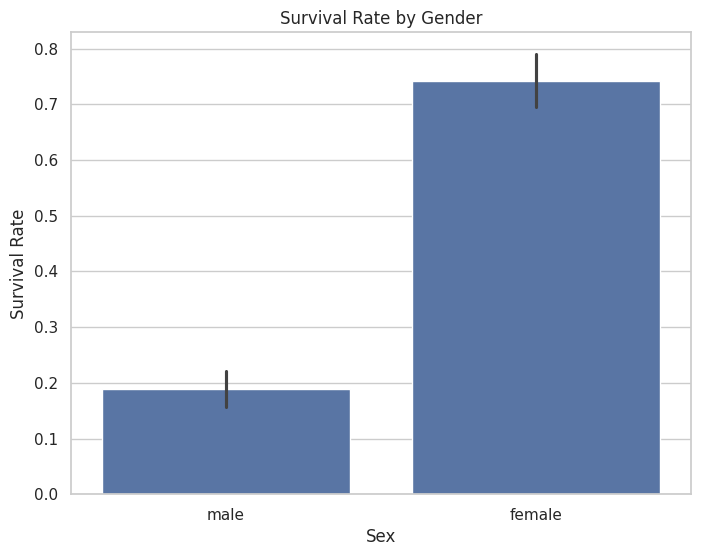

In [19]:
# 2) Survival Rate by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x = "Sex", y = "Survived", data = train_data)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

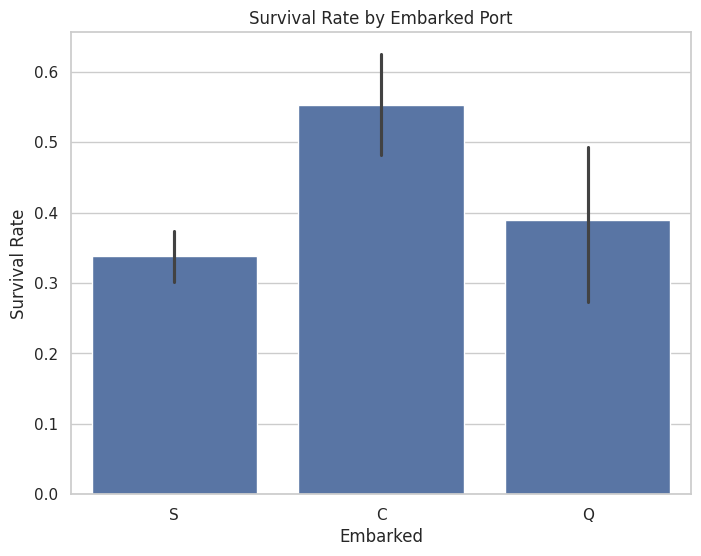

In [20]:
# 3) Survival Rate by Embarked Port
plt.figure(figsize = (8, 6))
sns.barplot(x = "Embarked", y = "Survived", data = train_data)
plt.title("Survival Rate by Embarked Port")
plt.ylabel("Survival Rate")
plt.show()

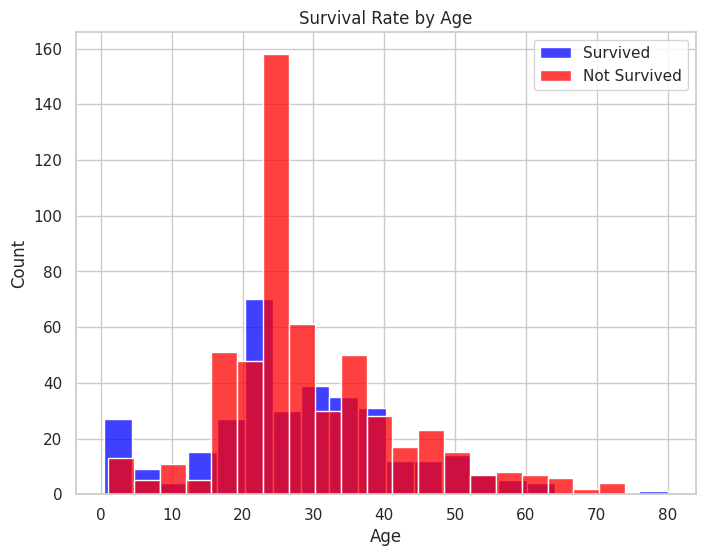

In [27]:
# 4) Survival Rate by Age (using a histogram)
plt.figure(figsize = (8, 6))
sns.histplot(train_data[train_data['Survived'] == 1]['Age'], bins = 20, label = 'Survived', color = 'blue')
sns.histplot(train_data[train_data['Survived'] == 0]['Age'], bins = 20, label = 'Not Survived', color = 'red')
plt.title("Survival Rate by Age")
plt.xlabel("Age")
plt.legend()
plt.show()

# The relationships between variables

*1. Survival Rate by Passenger Class:*

Passengers in first class had a significantly higher survival rate compared to those in second and third class.
The survival rate decreases as the class goes from 1st to 3rd.

*2. Survival Rate by Gender:*

Females had a much higher survival rate compared to males. This suggests that women were given priority during the rescue operations.

*3. Survival Rate by Embarked Port:*

Passengers who embarked from port C (Cherbourg) had a higher survival rate compared to those from S (Southampton) and Q (Queenstown).

*4. Survival Rate by Age:*

Younger passengers (children) had a higher chance of survival, while survival rates decreased for middle-aged adults.

There is a noticeable spike in survival for children aged between 0 and 10.